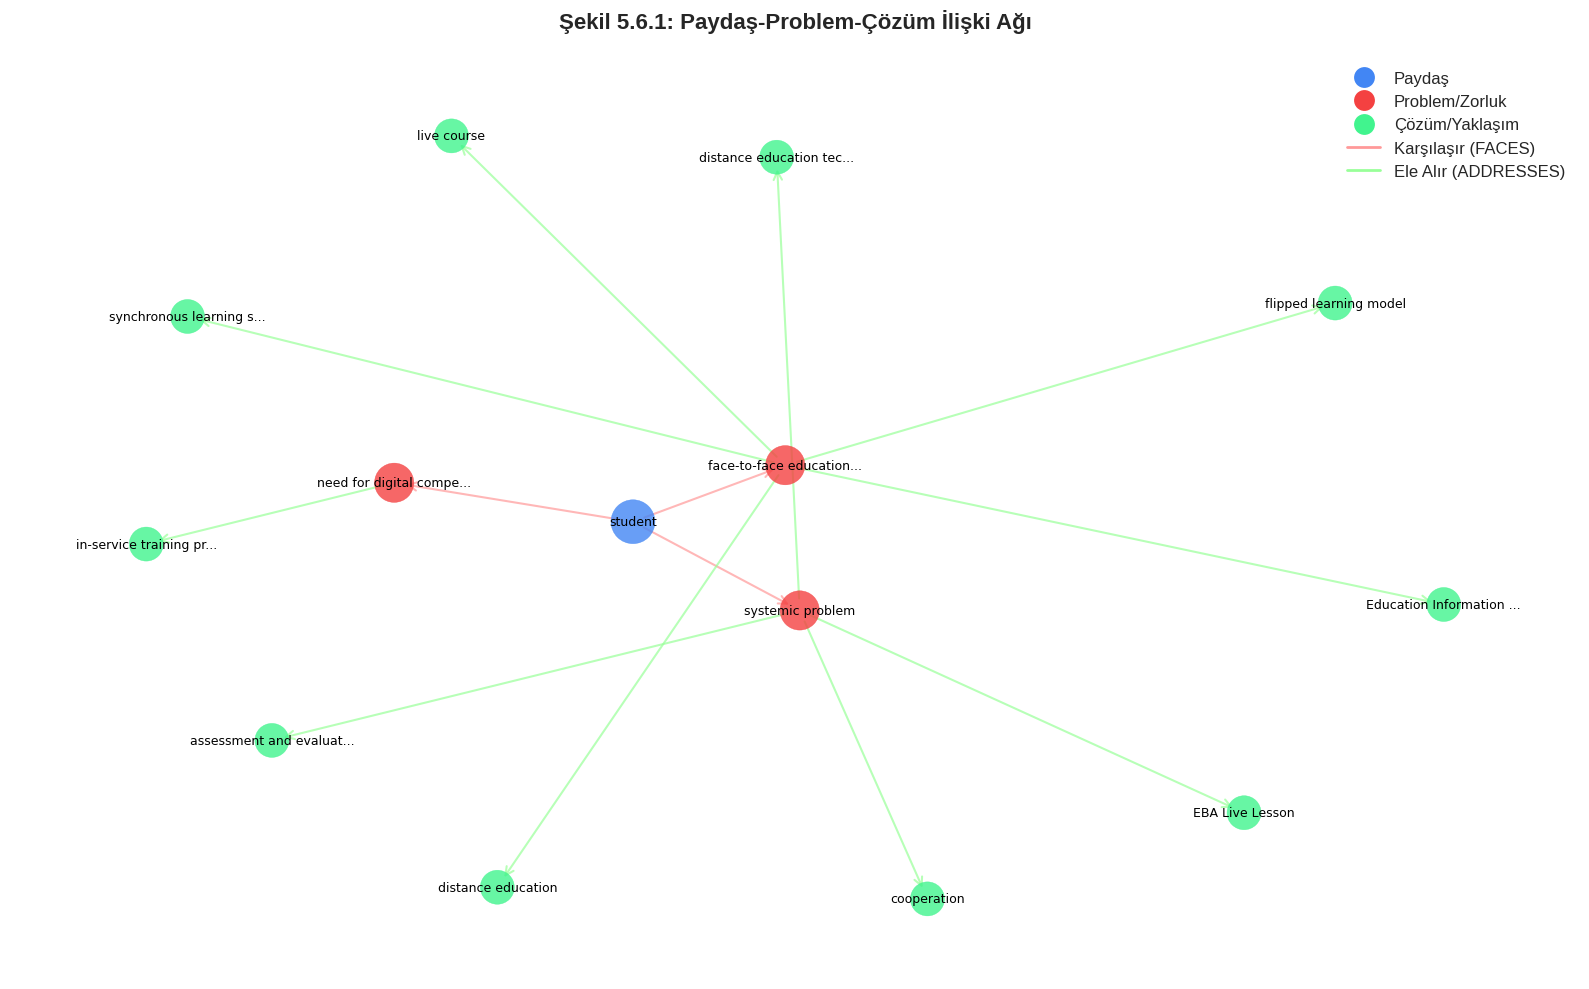

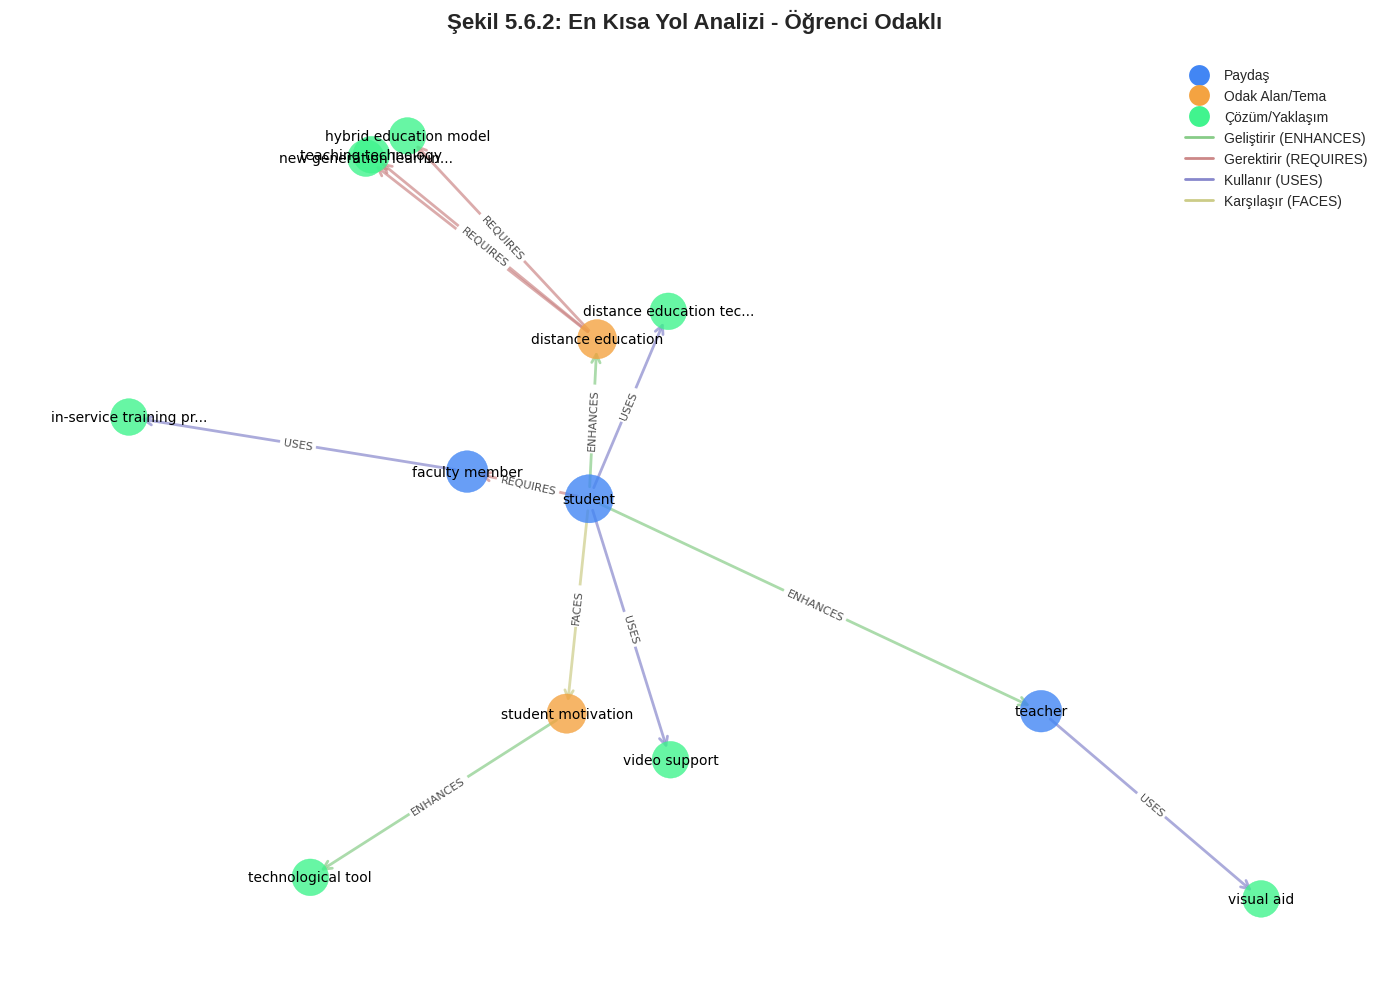

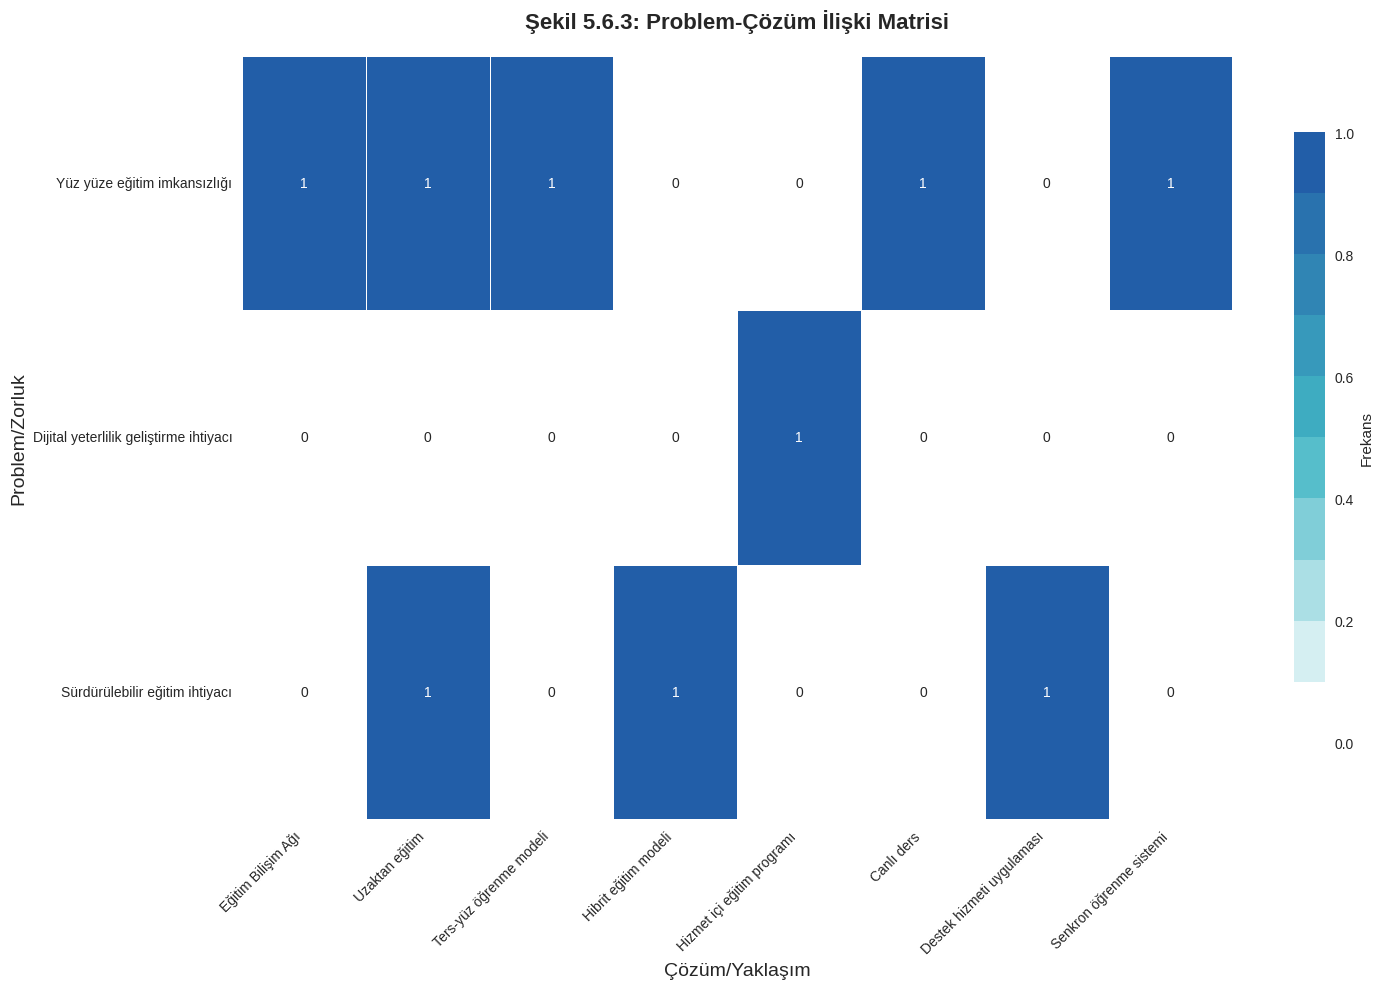

Tüm şekiller başarıyla oluşturuldu ve kaydedildi!


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# Türkçe karakter desteği ve stil ayarları
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Şekil 5.6.1: Paydaş-Problem-Çözüm İlişki Ağı (ağ diyagramı)
def create_figure_5_6_1():
    # Hardcoded data
    data = [
        {"stakeholder": "student", "problem": "face-to-face education impossibility", 
         "solution": "distance education", "chain_frequency": 1},
        {"stakeholder": "student", "problem": "face-to-face education impossibility", 
         "solution": "synchronous learning system", "chain_frequency": 1},
        {"stakeholder": "student", "problem": "face-to-face education impossibility", 
         "solution": "flipped learning model", "chain_frequency": 1},
        {"stakeholder": "student", "problem": "face-to-face education impossibility", 
         "solution": "live course", "chain_frequency": 1},
        {"stakeholder": "student", "problem": "face-to-face education impossibility", 
         "solution": "Education Information Network", "chain_frequency": 1},
        {"stakeholder": "student", "problem": "systemic problem", 
         "solution": "distance education technology", "chain_frequency": 1},
        {"stakeholder": "student", "problem": "systemic problem", 
         "solution": "cooperation", "chain_frequency": 1},
        {"stakeholder": "student", "problem": "systemic problem", 
         "solution": "EBA Live Lesson", "chain_frequency": 1},
        {"stakeholder": "student", "problem": "systemic problem", 
         "solution": "assessment and evaluation tools and methods", "chain_frequency": 1},
        {"stakeholder": "student", "problem": "need for digital competency improvement", 
         "solution": "in-service training program", "chain_frequency": 1}
    ]
    
    # Ağ oluşturma
    G = nx.DiGraph()
    
    # Düğümleri ve kenarları ekle
    for item in data:
        G.add_node(item["stakeholder"], type="STAKEHOLDER")
        G.add_node(item["problem"], type="PROBLEM_CHALLENGE")
        G.add_node(item["solution"], type="SOLUTION_APPROACH")
        
        # Kenarları ekle
        G.add_edge(item["stakeholder"], item["problem"], relation="FACES")
        G.add_edge(item["problem"], item["solution"], relation="ADDRESSED_BY")
    
    # Düğüm renkleri
    node_colors = {
        'STAKEHOLDER': '#4286f4',  # Mavi
        'PROBLEM_CHALLENGE': '#f44141',  # Kırmızı
        'SOLUTION_APPROACH': '#41f48e'   # Yeşil
    }
    
    # Düğüm renk listesi oluştur
    colors = [node_colors[G.nodes[node]['type']] for node in G.nodes()]
    
    # Düğüm büyüklüklerini belirle (derece merkeziliğine göre)
    node_size = []
    for node in G.nodes():
        if G.nodes[node]['type'] == 'STAKEHOLDER':
            node_size.append(1000)  # Paydaşlar büyük
        elif G.nodes[node]['type'] == 'PROBLEM_CHALLENGE':
            node_size.append(800)   # Problemler orta
        else:
            node_size.append(600)   # Çözümler küçük
    
    # Şekil oluştur
    plt.figure(figsize=(16, 10))
    
    # Ağ düzeni
    pos = nx.spring_layout(G, k=0.8, iterations=100, seed=42)
    
    # Düğümleri çiz
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_size, alpha=0.8)
    
    # Kenarları çiz
    edge_colors = ['#ff9999' if G[u][v]['relation'] == 'FACES' else '#99ff99' 
                  for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5, 
                          arrowstyle='->', arrowsize=15, alpha=0.7)
    
    # Etiketleri çiz
    labels = {}
    for node in G.nodes():
        # Uzun etiketleri kısalt
        if len(node) > 25:
            labels[node] = node[:22] + '...'
        else:
            labels[node] = node
    
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_family='DejaVu Sans')
    
    # Lejant ekle
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#4286f4', markersize=15, label='Paydaş'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#f44141', markersize=15, label='Problem/Zorluk'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#41f48e', markersize=15, label='Çözüm/Yaklaşım'),
        plt.Line2D([0], [0], color='#ff9999', lw=2, label='Karşılaşır (FACES)'),
        plt.Line2D([0], [0], color='#99ff99', lw=2, label='Ele Alır (ADDRESSES)')
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=12)
    
    plt.title('Şekil 5.6.1: Paydaş-Problem-Çözüm İlişki Ağı', fontsize=16, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('Şekil 5.6.1 Paydaş-Problem-Çözüm İlişki Ağı.png', dpi=300, bbox_inches='tight')
    plt.show()

# Şekil 5.6.2: En Kısa Yol Analizi - Öğrenci Odaklı (yol diyagramı)
def create_figure_5_6_2():
    # Hardcoded data
    data = [
        {"path_nodes": ["student", "distance education", "hybrid education model"], 
         "relationship_types": ["ENHANCES", "REQUIRES"], "path_length": 2},
        {"path_nodes": ["student", "distance education technology"], 
         "relationship_types": ["USES"], "path_length": 1},
        {"path_nodes": ["student", "distance education", "new generation learning technology"], 
         "relationship_types": ["ENHANCES", "REQUIRES"], "path_length": 2},
        {"path_nodes": ["student", "faculty member", "in-service training program"], 
         "relationship_types": ["REQUIRES", "USES"], "path_length": 2},
        {"path_nodes": ["student", "distance education", "teaching technology"], 
         "relationship_types": ["ENHANCES", "REQUIRES"], "path_length": 2},
        {"path_nodes": ["student", "student motivation", "technological tool"], 
         "relationship_types": ["FACES", "ENHANCES"], "path_length": 2},
        {"path_nodes": ["student", "video support"], 
         "relationship_types": ["USES"], "path_length": 1},
        {"path_nodes": ["student", "teacher", "visual aid"], 
         "relationship_types": ["ENHANCES", "USES"], "path_length": 2}
    ]
    
    # Ağ oluşturma
    G = nx.DiGraph()
    
    # Varlık türleri - direkt düğüm adına göre
    stakeholders = ["student", "teacher", "faculty member"]
    focus_areas = ["distance education", "student motivation"]
    
    # Düğümleri ve kenarları ekle - type özelliği kullanmadan
    for path in data:
        # Yol üzerindeki düğümleri ekle
        for i, node in enumerate(path["path_nodes"]):
            # Düğümü ekle (varsa güncellemez)
            G.add_node(node)
            
            # Kenarı ekle
            if i < len(path["path_nodes"]) - 1:
                relation = path["relationship_types"][i]
                source = path["path_nodes"][i]
                target = path["path_nodes"][i+1]
                G.add_edge(source, target, relation=relation)
    
    # Şekil oluştur
    plt.figure(figsize=(14, 10))
    
    # Ağ düzeni (hierarchical layout)
    pos = nx.kamada_kawai_layout(G)
    
    # Öğrenci düğümünü merkezde konumlandır
    for node in pos:
        if node == 'student':
            pos[node] = np.array([0, 0])
    
    # Düğüm renkleri - doğrudan düğüm adına göre belirle
    node_colors = []
    for node in G.nodes():
        if node in stakeholders:
            node_colors.append('#4286f4')  # Mavi - Paydaşlar
        elif node in focus_areas:
            node_colors.append('#f4a341')  # Turuncu - Odak alanları
        else:
            node_colors.append('#41f48e')  # Yeşil - Çözümler (varsayılan)
    
    # Düğüm büyüklükleri - doğrudan düğüm adına göre belirle
    node_size = []
    for node in G.nodes():
        if node == 'student':
            node_size.append(1200)  # Öğrenci merkezi
        elif node in stakeholders:
            node_size.append(900)   # Diğer paydaşlar
        elif node in focus_areas:
            node_size.append(800)   # Odak alanları
        else:
            node_size.append(700)   # Çözümler (varsayılan)
    
    # Düğümleri çiz
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_size, alpha=0.8)
    
    # Kenarları çiz
    edge_colors = []
    for u, v in G.edges():
        if G[u][v]['relation'] == 'ENHANCES':
            edge_colors.append('#88cc88')  # Açık yeşil
        elif G[u][v]['relation'] == 'REQUIRES':
            edge_colors.append('#cc8888')  # Açık kırmızı
        elif G[u][v]['relation'] == 'USES':
            edge_colors.append('#8888cc')  # Açık mavi
        elif G[u][v]['relation'] == 'FACES':
            edge_colors.append('#cccc88')  # Açık sarı
        else:
            edge_colors.append('#aaaaaa')  # Gri
    
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2, 
                          arrowstyle='->', arrowsize=15, alpha=0.7)
    
    # Etiketleri çiz
    labels = {}
    for node in G.nodes():
        # Uzun etiketleri kısalt
        if len(node) > 25:
            labels[node] = node[:22] + '...'
        else:
            labels[node] = node
    
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_family='DejaVu Sans')
    
    # Kenar etiketlerini çiz
    edge_labels = {(u, v): G[u][v]['relation'] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, 
                                font_family='DejaVu Sans', alpha=0.7)
    
    # Lejant ekle
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#4286f4', markersize=15, label='Paydaş'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#f4a341', markersize=15, label='Odak Alan/Tema'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#41f48e', markersize=15, label='Çözüm/Yaklaşım'),
        plt.Line2D([0], [0], color='#88cc88', lw=2, label='Geliştirir (ENHANCES)'),
        plt.Line2D([0], [0], color='#cc8888', lw=2, label='Gerektirir (REQUIRES)'),
        plt.Line2D([0], [0], color='#8888cc', lw=2, label='Kullanır (USES)'),
        plt.Line2D([0], [0], color='#cccc88', lw=2, label='Karşılaşır (FACES)')
    ]
    plt.legend(handles=legend_elements, loc='best', fontsize=10)
    
    plt.title('Şekil 5.6.2: En Kısa Yol Analizi - Öğrenci Odaklı', fontsize=16, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('Şekil 5.6.2 En Kısa Yol Analizi - Öğrenci Odaklı.png', dpi=300, bbox_inches='tight')
    plt.show()

# Şekil 5.6.3: Problem-Çözüm İlişki Matrisi (ısı haritası)
def create_figure_5_6_3():
    # Hardcoded data
    data = [
        {"problem": "face-to-face education impossibility", "solution": "distance education", "frequency": 1},
        {"problem": "face-to-face education impossibility", "solution": "synchronous learning system", "frequency": 1},
        {"problem": "face-to-face education impossibility", "solution": "flipped learning model", "frequency": 1},
        {"problem": "face-to-face education impossibility", "solution": "live course", "frequency": 1},
        {"problem": "face-to-face education impossibility", "solution": "Education Information Network", "frequency": 1},
        {"problem": "need for sustainable education", "solution": "hybrid education model", "frequency": 1},
        {"problem": "need for sustainable education", "solution": "support service implementation", "frequency": 1},
        {"problem": "need for sustainable education", "solution": "distance education", "frequency": 1},
        {"problem": "need for digital competency improvement", "solution": "in-service training program", "frequency": 1},
        {"problem": "need for digital competency improvement", "solution": "technology-supported case-based activity", "frequency": 1},
        {"problem": "low technological pedagogical content knowledge", "solution": "technology-supported in-service training program", "frequency": 1},
        {"problem": "low technological pedagogical content knowledge", "solution": "integration of technology", "frequency": 1},
        {"problem": "low technological pedagogical content knowledge", "solution": "in-service training", "frequency": 1}
    ]
    
    # Bu veriyi pivot tablo formatına dönüştür
    df = pd.DataFrame(data)
    
    # En sık kullanılan problemleri ve çözümleri seç (görselliği iyileştirmek için)
    top_problems = df['problem'].value_counts().nlargest(8).index.tolist()
    top_solutions = df['solution'].value_counts().nlargest(8).index.tolist()
    
    # Filtreleme
    df_filtered = df[df['problem'].isin(top_problems) & df['solution'].isin(top_solutions)]
    
    # Pivot tablo
    pivot_df = df_filtered.pivot_table(index='problem', columns='solution', 
                                       values='frequency', aggfunc='sum', fill_value=0)
    
    # Daha okunabilir isimler için kısaltma
    index_mapping = {
        'face-to-face education impossibility': 'Yüz yüze eğitim imkansızlığı',
        'need for sustainable education': 'Sürdürülebilir eğitim ihtiyacı',
        'need for digital competency improvement': 'Dijital yeterlilik geliştirme ihtiyacı',
        'low technological pedagogical content knowledge': 'Düşük teknolojik pedagojik içerik bilgisi'
    }
    
    column_mapping = {
        'distance education': 'Uzaktan eğitim',
        'synchronous learning system': 'Senkron öğrenme sistemi',
        'flipped learning model': 'Ters-yüz öğrenme modeli',
        'live course': 'Canlı ders',
        'Education Information Network': 'Eğitim Bilişim Ağı',
        'hybrid education model': 'Hibrit eğitim modeli',
        'support service implementation': 'Destek hizmeti uygulaması',
        'in-service training program': 'Hizmet içi eğitim programı',
        'technology-supported case-based activity': 'Teknoloji destekli vaka tabanlı aktivite',
        'technology-supported in-service training program': 'Teknoloji destekli hizmet içi eğitim programı',
        'integration of technology': 'Teknoloji entegrasyonu',
        'in-service training': 'Hizmet içi eğitim'
    }
    
    # İndeks ve sütun isimlerini değiştir
    pivot_df.index = [index_mapping.get(idx, idx) for idx in pivot_df.index]
    pivot_df.columns = [column_mapping.get(col, col) for col in pivot_df.columns]
    
    # Görselleştirme
    plt.figure(figsize=(15, 10))
    
    # Özel renk paleti oluştur (çözüm yoğunluğu için)
    cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#ffffff", "#41b6c4", "#225ea8"], N=10)
    
    # Isı haritası
    ax = sns.heatmap(pivot_df, annot=True, cmap=cmap, linewidths=.5, fmt='.0f', 
                     annot_kws={"size": 10}, cbar_kws={"shrink": .8, "label": "Frekans"})
    
    # Görsel iyileştirmeler
    plt.title('Şekil 5.6.3: Problem-Çözüm İlişki Matrisi', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Çözüm/Yaklaşım', fontsize=14)
    plt.ylabel('Problem/Zorluk', fontsize=14)
    
    # Y-ekseni etiketlerinin okunabilirliği için ayarlama
    plt.yticks(rotation=0, fontsize=10)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('Şekil 5.6.3 Problem-Çözüm İlişki Matrisi.png', dpi=300, bbox_inches='tight')
    plt.show()

# Tüm şekilleri oluştur
if __name__ == "__main__":
    create_figure_5_6_1()
    create_figure_5_6_2()
    create_figure_5_6_3()
    print("Tüm şekiller başarıyla oluşturuldu ve kaydedildi!")